In [109]:
!uv pip install numpy scipy matplotlib seaborn pandas scikit-learn

Current directory does not exist


In [110]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="white", palette="pastel")

In [111]:
iris = load_iris(as_frame=True)
df: pd.DataFrame = iris["frame"]
df["species"] = iris.target_names[iris.target]
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 1. Descriptive Statistics
- Compute mean, median, and standard deviation of sepal length, grouped by species
- Identify which species shows the highest variability
- Brief interpretation (1–2 lines)

In [112]:
stats_result = df.groupby(["species"])["sepal length (cm)"].agg(
    mean="mean",
    median="median",
    stddev="std",
)
stats_result

,mean,median,stddev
species,,,
setosa,5.006,5.0,0.352490
versicolor,5.936,5.9,0.516171
virginica,6.588,6.5,0.635880


Virginica shows the highest variability which has the highest standard deviation.

## 2. Central Tendency & Dispersion
- For petal length (per species), compute:
  - mean
  - median
  - mode (if any)
  - variance
  - standard deviation
- Explain briefly:
  - When does the median tell a different story than the mean?

In [113]:
stats_result = df.groupby(["species"])["petal length (cm)"].agg(
    mean="mean",
    median="median",
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,  # Maybe returns more than 1 value, or even empty
    variance="var",
    stddev="std",
)
stats_result

,mean,median,mode,variance,stddev
species,,,,,
setosa,1.462,1.50,1.4,0.030159,0.173664
versicolor,4.260,4.35,4.5,0.220816,0.469911
virginica,5.552,5.55,5.1,0.304588,0.551895


The median tell a different story than the mean when the data is skewed or contains outliers. Extreme values can pull the mean up or down, while the median stays closer to the typical value.

## 3. Visualization
- Plot a histogram of petal width (all species combined)
- Create a boxplot of sepal length, grouped by species
- Answer:
  - Which plot better shows between-species differences, and why?

<Axes: xlabel='petal width (cm)', ylabel='Count'>

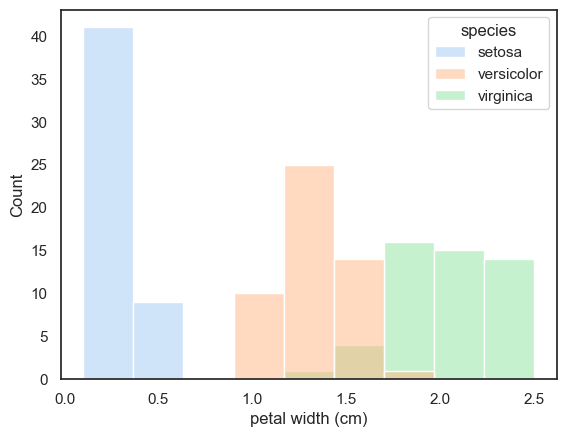

In [114]:
sns.histplot(df, x="petal width (cm)", hue="species")

<Axes: xlabel='species', ylabel='sepal length (cm)'>

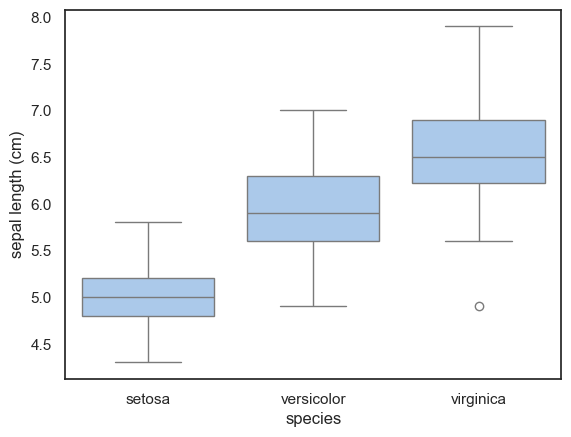

In [115]:
sns.boxplot(df, x="species", y="sepal length (cm)")

Boxplot shows between-species differences better. 2 reasons:
  1. There is no overlap between the shapes showed in the diagram;
  2. Boxplot contains more statistical metrics than histplot, such as, median, Q1, Q3, IQR and outliers.

## 4. Distributions & Skewness
- Compute skewness of petal length for each species
- Identify:
  - Most positively skewed
  - Most negatively skewed
- Provide a short interpretation

In [116]:
stats_result = df.groupby(["species"])["petal length (cm)"].agg(skew="skew")
stats_result

,skew
species,
setosa,0.106394
versicolor,-0.606508
virginica,0.549445


Virginica is the most positively skewed; Versicolour is the most negatively skewed.

Interpretation: Virginica has more petal length values below its mean, while Versicolor has more petal length values above its mean. The distributions of these two species are not close to a normal distribution to some extent.

## 5. Sampling & Central Limit Theorem (Mini Task)
- Take 100 random samples of size n = 20 from sepal length
- Store the sample means
- Plot:
  - Histogram of the sample means
  - Histogram of the original sepal length
- Compare the two distributions (1–2 lines)

Text(0.5, 1.0, 'Sepal Length')

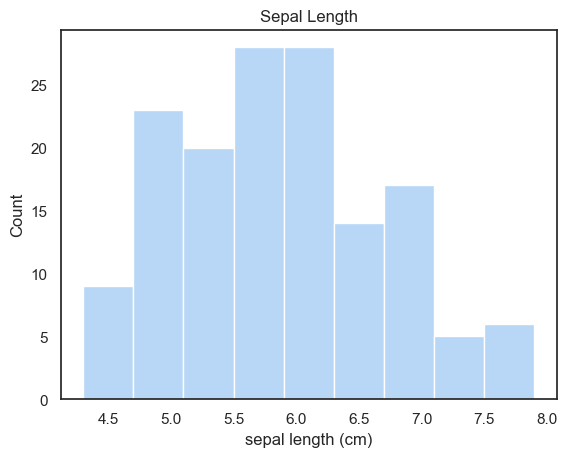

In [117]:
sns.histplot(df["sepal length (cm)"])
plt.title("Sepal Length")

Text(0.5, 1.0, 'Sample Means')

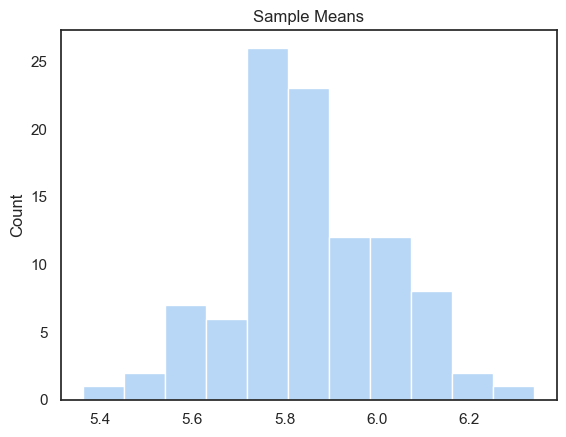

In [118]:
sample_means = []

for _ in range(100):
    # Randomly choose 20 samples and calculate the mean of them.
    mean_value = df["sepal length (cm)"].sample(n=20).mean()
    sample_means.append(mean_value)

sns.histplot(sample_means)
plt.title("Sample Means")

The original sepal length distribution is somewhat skewed and spread out, while the distribution of sample means is much tighter and more symmetric, appearing closer to a normal distribution due to the Central Limit Theorem.

## 6. Correlation
- Compute Pearson correlation (r) between:
  - sepal length
  - petal length
- State whether the relationship is:
  - positive
  - negative
  - or none
- Plot:
  - Scatter plot with best-fit line

In [119]:
r, p_value = stats.pearsonr(df["sepal length (cm)"], df["petal length (cm)"])
print(f"r = {r:.4f}, p_value = {p_value:.6e}")

r = 0.8718, p_value = 1.038667e-47


The Pearson correlation coefficient $r = 0.8718$ (positive and close to 1) indicates a strong positive linear relationship, and the extremely small p-value shows that this relationship is statistically highly significant.

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

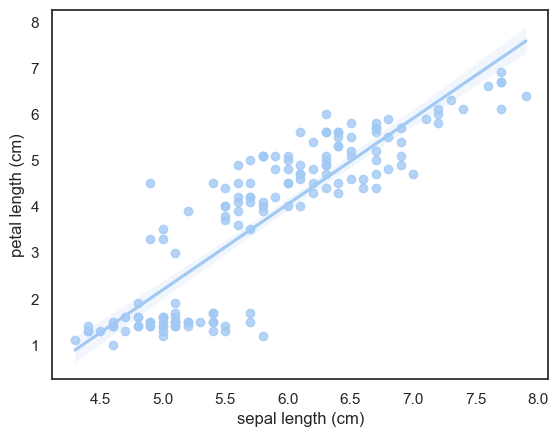

In [120]:
sns.regplot(df, x="sepal length (cm)", y="petal length (cm)")

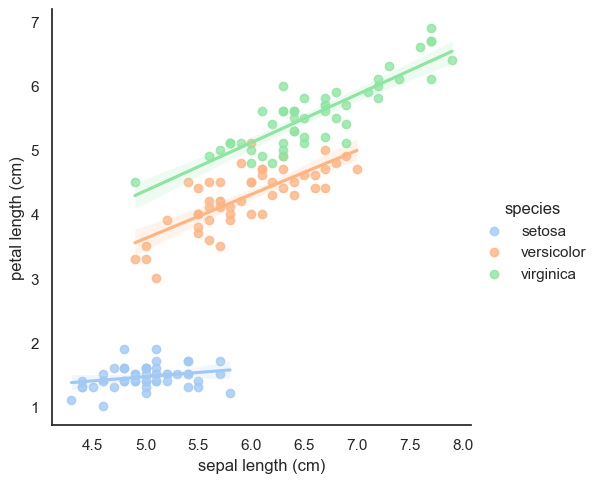

In [123]:
sns.lmplot(df, x="sepal length (cm)", y="petal length (cm)", hue="species")

## 7. Hypothesis Testing: t-Test (2 Groups)
- Test whether Setosa and Versicolor have the same mean petal length
- Report:
  - t-statistic
  - p-value
- Provide a one-line conclusion

In [121]:
t_stat, p_value = stats.ttest_ind(
    df[df["species"] == "setosa"]["petal length (cm)"],
    df[df["species"] == "versicolor"]["petal length (cm)"],
)
print(f"t_stat = {t_stat:.4f}, p_value = {p_value:.6e}")

t_stat = -39.4927, p_value = 5.404911e-62


The p-value is far below 0.05, so we reject the null hypothesis. The negative t-statistic indicates that Setosa has a significantly smaller mean petal length than Versicolor.

## 8. Hypothesis Testing: ANOVA (3 Groups)
- Test whether petal width differs across:
  - Setosa
  - Versicolor
  - Virginica
- Report:
  - F-statistic
  - p-value
- Provide a one-line conclusion

In [122]:
f_stat, p_value = stats.f_oneway(
    df[df["species"] == "setosa"]["petal width (cm)"],
    df[df["species"] == "versicolor"]["petal width (cm)"],
    df[df["species"] == "virginica"]["petal width (cm)"],
)
print(f"f_stat = {f_stat:.4f}, p_value = {p_value:.6e}")

f_stat = 960.0071, p_value = 4.169446e-85


The p-value is far below 0.05, so we reject the null hypothesis and conclude that mean petal width differs significantly among Setosa, Versicolor, and Virginica.